# Bericht zu Versuch 21 "Energieverteilung im Spektrum"

**Datum:** <2022-1M-DD>
 
 - **Student 1:** <vollständiger Name>
 - **Student 2:** <vollständiger Name>

## 1. Überblick

### 1.1 Einführung

- Um was geht es in dem Versuch? Was ist das Ziel?

### 1.2 Zusammenfassung der Theorie

- Erläuterung der benutzten Formeln inkl. Variablenbeschriftung (Bsp. vom Vorversuch)
    - Darstellung z.B. durch "\\$\\$ T = 2\pi \sqrt{\frac{L}{g}} \\$\\$" --> $$T=2\pi\sqrt{\frac{L}{g}}$$, wobei $T$ die Schinwungsdauer des Pendels für eine Oszillation, $L$ die Länge des Pendels und $g$ die Erdbeschleunigung.
    - $$\phi = A \exp(-\frac{\gamma t}{2})\cos(\omega t + \alpha)$$, wobei $\phi$ die Auslenkung der Schwingung, $A$ die ursprüngliche Amplitude der Schwingung, $\gamma$ der Reibungskoeffizient und $\omega$ die Kreisfrequenz.

### 1.3 Aufgaben

- Was sind die Aufgabenstellungen für den Versuch?

### 1.4 Umweltrelevanz

- Inwiefern ist der Versuch relevant für euer Studium in Umweltwissenschaften? (1-2 Sätze)

## 2. Messdaten

### 2.1 Packages laden

In [1]:
# Importieren der benutzten Packages

# Meist benötigt: 
import numpy as np  # Math
from uncertainties import ufloat # ufloat( , ) für die Fehlerrechnung
from uncertainties.umath import *  # Für Funktionen wie sin, cos

# Falls benutzt
import pandas as pd # z.B. zum Importieren von Excel-Tabellen (csv-Files)
import matplotlib.pyplot as plt # Plotting
from uncertainties import unumpy # für uncertainties in arrays
#from scipy import linregress # Lineare regression
from IPython.display import display, Markdown

Tabulate installieren, um tabellen übersichtlich anzuzeigen

In [2]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2.2 Funktionen definieren 

#### 2.2.1 Some Basics

In [3]:
# Funktionen schreiben und anwenden:
#
# Zuerst Funktion definieren
# def name_der_funktion(Eingabewert1, Eingabewert2, ...):
#     zu_berechnende_variable = Eingabewert1 * Eingabewert2
#     zu_berechnende_variable2 = Eingabewert1 + Eingabewert2
#     return zu_berechnende_variable, zu_berechnende_variable2, ...
#
# Anwendung:
# wert1, wert2 = name_der_funktion(Eingabewert1, Eingabewert2, ...)


# uarrays
# Beispieldaten
Messwerte = [1,2,3,2,5,7,4,5,2,1,4] # das ist ein array
Standardabweichung = np.std(Messwerte) # das ist ein float
Messwerte_mit_Fehler = unumpy.uarray(Messwerte,Standardabweichung) # das ist ein uarray

# Achtung!!!
# für Mittelwertberechnung ist folgendes nicht erlaubt, da so Fehlerfortpflanzung gemacht 
# wird, obwohl auch die Standardabweichung der Fehler des Mittelwerts ist:
Falscher_Mittelwert = np.mean(Messwerte_mit_Fehler)
# So geht es richtig
Mittelwert = ufloat(np.mean(Messwerte),Standardabweichung)
# Im Allgemeinen werden in der Auswertung ("beim Einsetzen in die Formel") ufloats mit 
# Mittelwert und Standardabweichung benutzt.

#### 2.2.2 Darstellen der Daten mit tabulate

In [4]:
# erfundene Beispieldaten, jede Liste muss gleich lang sein
Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2 = [1.42545,2.4235,3.324,4.435,5.135,6.46,7.24], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7]

table = [Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2] # kann beliebig erweitert werden. Falls der Fehler jedes Messwerts derselbe ist könnt ihr ihn auch in den header schreiben.
header = ['Titel1 [Einheit]', 'Fehler_Titel1 [Einheit]', 'Titel2', 'Fehler_Titel2'] # muss selbe Anzahl Einträge haben wie table.

#Funktion zum Tabellen erstellen aus einem table. Input: table(liste in liste), header
from tabulate import tabulate
def Tabelle(table, header, Kommastellen):
    for i in range(len(table)):
        for k in range(len(table[i])):
            table[i][k] = np.round(table[i][k], Kommastellen)
    for i in range(len(header)):
        table[i].insert(0,header[i])
    table = np.matrix.transpose(np.array(table))
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
    return 

Tabelle(table, header, 2) # Hier wird die Funktion ausgeführt

╒════════════════════╤═══════════════════════════╤══════════╤═════════════════╕
│   Titel1 [Einheit] │   Fehler_Titel1 [Einheit] │   Titel2 │   Fehler_Titel2 │
╞════════════════════╪═══════════════════════════╪══════════╪═════════════════╡
│               1.43 │                         1 │        1 │               1 │
├────────────────────┼───────────────────────────┼──────────┼─────────────────┤
│               2.42 │                         2 │        2 │               2 │
├────────────────────┼───────────────────────────┼──────────┼─────────────────┤
│               3.32 │                         3 │        3 │               3 │
├────────────────────┼───────────────────────────┼──────────┼─────────────────┤
│               4.43 │                         4 │        4 │               4 │
├────────────────────┼───────────────────────────┼──────────┼─────────────────┤
│               5.14 │                         5 │        5 │               5 │
├────────────────────┼──────────────────

#### 2.2.3 Polynomfit der Eichkurven
Die Umrechnung von $\gamma_0-\gamma$ in $log_{10}(\lambda)$ bzw. $log_{10}(|d\lambda/d\gamma|)$ kann mithilfe der folgenden Funktionen erfolgen, und muss nicht händisch auf der Eichkurve abgelesen werden.

In [5]:
# generisches Polynom
def polynom(coefficients, x): # coefficients: array mit den Koeffizienten
    poly = 0
    for i in range(len(coefficients)):
        poly = poly + coefficients[i]*x**i
    return poly

# Fitfunktion für log10(lambda)
def log10lambda(x): # lambda in Mikrometer, x = gamma0-gamma [°] 
    coefficients = [-0.23991, -0.01573, 0.00226, -1.21005E-4, -7.53654E-5, -4.09306E-6, 1.70008E-6, 1.30007E-7] # B0 ... B7 von der Eichkurven-Fitfunktion
    return polynom(coefficients, x)

# Fitfunktion von log10(|dlambda/dgamma|)
def log10dlambda_dgamma(x): # lambda in Mikrometer, x = gamma0 - gamma [°] 
    coefficients = [-1.63959,-0.08758,0.00106,5.9517E-4,1.86036E-4,-2.01466E-5,-3.45518E-6,-5.57806E-8]
    return polynom(coefficients,x)

#### 2.2.4 Spezifische Fuktionen zur Umrechnung von $\gamma$ und $I$ in $\lambda$ und $C\cdot E$ in Aufgabe 2

In [6]:
# Berechnung von gamma0-gamma (hier als Beispiel):
def gamma_diff(gamma0, gamma): 
    # 'gamma0' ist ein (u)float, gamma ist jedoch ein (u)array -> die Berechnung muss einzeln erfolgen 
    # für jedes Element von 'gamma' 
    diff = [] # erzeuge ein leeres array 'diff'
    for i in range(len(gamma)): 
        diff.append(gamma0 - gamma[i]) # für jedes Element i aus 'gamma' füge ein Element zu 'diff' hinzu, 
                                       # das den Wert (gamma0 - gamma[i]) hat
    return diff

# Berechnung von log(lambda)
 
    
# Berechnung von lambda


# Berechnung von log(|dlambda/dgamma|)


# Berechnung von dlambda/dgamma


# Berechnung von C*E



### 2.3 Messdaten einlesen

#### 2.3.1 Einlesen von Daten - Basics

In [31]:
#------------------------------------------------------------------------------------
# Möglichkeit 1: aus einer CSV Tabelle
#------------------------------------------------------------------------------------

#data = pd.read_csv('./pfad/zur/datei.csv') 
#Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2 = data.Spalte1, data.Spalte2, data.Spalte3, data.Spalte4

# jede Liste muss gleich lang sein
# die Spalte mit dem Namen 'Spalte1' wird in der Variable 'Messwerte1' gespeichert,
# die Spalte mit dem Namen 'Spalte2' wird in der Variable 'Messwerte2' gespeichert usw.

############################################################
data = pd.read_csv('./V8.csv') # '/pfad/zur/datei.csv'
gamma_M1, I_M1 = data.gamma, data.I 

data2 = pd.read_csv('./V6.csv') # '/pfad/zur/datei.csv'
gamma_M2, I_M2 = data2.gamma, data.I 

data3 = pd.read_csv('./V4.csv') # '/pfad/zur/datei.csv'
gamma_M3, I_M3 = data3.gamma, data.I 
#############################################################

#------------------------------------------------------------------------------------
# Möglichkeit 1: manuell einlesen
#------------------------------------------------------------------------------------

Messwerte1, Fehler_Messwerte1, Messwerte2, Fehler_Messwerte2 = [1,2,3,4,5,6,7], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7]

#### 2.3.2 Messwerte

In [8]:
#--------------------------------------------------------------------
# Beispiel:

# Eine Variable
# Variable = ufloat(Messwert, Absoluter Fehler) # [Einheit]
ein_gamma = ufloat(20.33, 0.17) # [°]
# mehrere Variablen in ein (u)array zusammengefasst
mehrere_gammas = unumpy.uarray([20.33, 18.57, 23.10], [0.17, 0.34, 0.68]) # [°]
#--------------------------------------------------------------------


# Lage der gelben Hg-Linie:
gamma0 = ... # [Einheit]


#--------------------------------------------------------------------
# Aufgabe 1: Kontrolle der Eichkurve
#--------------------------------------------------------------------

# Lage der 4 Spektrallinien der Hg-Lampe
gamma_Hg = ... # [Einheit]


#--------------------------------------------------------------------
# Aufgabe 2: Energieverteilung einer Wolframband-/Halogenlampe
#--------------------------------------------------------------------

# Verwendete Lampe: .........

# Messwerte für Ablenkwinkel und Intensität für 3 verschiedene Spannungen

#Messung 1:
Spannung1 = ... # [Einheit]
gamma_U1 = ... # [Einheit]
intensity_U1 = ... # [Einheit]

#Messung 2:
Spannung2 = ... # [Einheit]
gamma_U2 = ... # [Einheit]
intensity_U2 = ... # [Einheit]

# Messung 3:
Spannung3 = ... # [Einheit]
gamma_U3 = ... # [Einheit]
intensity_U3 = ... # [Einheit]

## 3. Auswertung

#### Je nach Aufgabenstellung
- Graphische Darstellungen
- Berechnungen aller Resultate (inkl. Fehlerrechnung)
- Beantwortung der Aufgabenstellungen von 1 bis 3

### 3.1 Kontrolle der Eichkurve

In [9]:
# Übersichtliche (tabellarische) Darstellung der Resultate (inkl. Fehler!!) und 
# Vergleich mit den Literaturwerten für die Wellenlängen der Hg-Linien

header1 = ['gamma []', 'gamma0-gamma []', 'lambda_messung []', 'lambda_theorie []'] # Einheiten [] bitte ergänzen
table1 = [[],[],[],[]]
kommastellen1 = None

Tabelle(table1, header1, kommastellen1)


╒════════════╤═══════════════════╤═════════════════════╤═════════════════════╕
│ gamma []   │ gamma0-gamma []   │ lambda_messung []   │ lambda_theorie []   │
╞════════════╪═══════════════════╪═════════════════════╪═════════════════════╡
╘════════════╧═══════════════════╧═════════════════════╧═════════════════════╛


### 3.2 Energieverteilung einer Wolframband-/Halogenlampe

In [21]:
# Übersichtliche (tabellarische) Darstellung der Resultate inkl. Fehler

# Messung 1:
print('\n 1. Messung: U = ', Spannung1, '[Einheit]')
header2 = ['gamma []', 'gamma0-gamma []', 'lambda []', 'dlambda/dgamma []', 'I []', 'CE []'] # Einheiten [] bitte ergänzen
tableM1 = [[],[],[],[],[],[]]
kommastellenM1 = None
Tabelle(tableM1, header2, kommastellenM1)
   
# Messung 2:
   
      
# Messung 3:




 1. Messung: U =  Ellipsis [Einheit]
╒════════════╤═══════════════════╤═════════════╤═════════════════════╤════════╤═════════╕
│ gamma []   │ gamma0-gamma []   │ lambda []   │ dlambda/dgamma []   │ I []   │ CE []   │
╞════════════╪═══════════════════╪═════════════╪═════════════════════╪════════╪═════════╡
╘════════════╧═══════════════════╧═════════════╧═════════════════════╧════════╧═════════╛


1. Messung: U =  Ellipsis [Einheit]
╒════════════╤═══════════════════╤═════════════╤═════════════════════╤════════╤═════════╕
│ gamma []   │ gamma0-gamma []   │ lambda []   │ dlambda/dgamma []   │ I []   │ CE []   │
╞════════════╪═══════════════════╪═════════════╪═════════════════════╪════════╪═════════╡
╘════════════╧═══════════════════╧═════════════╧═════════════════════╧════════╧═════════╛

 1. Messung: U =  Ellipsis [Einheit]
╒════════════╤═══════════════════╤═════════════╤═════════════════════╤════════╤═════════╕
│ gamma []   │ gamma0-gamma []   │ lambda []   │ dlambda/dgamma []   │ I [] 

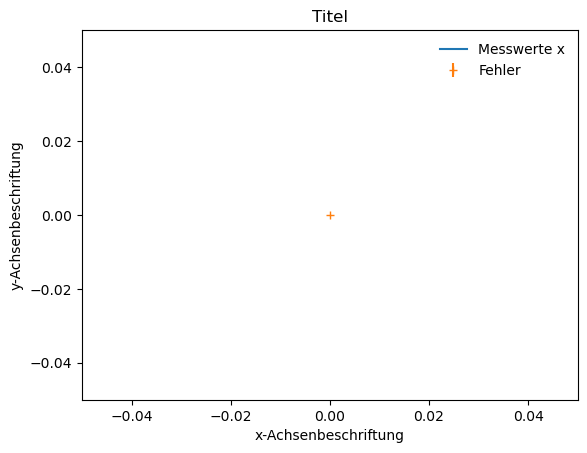

In [23]:
#------------------------------------------------------------------------------------
# Grafische Darstellung der spektralen Strahlungsdichte
#------------------------------------------------------------------------------------
# CE gegen lambda auftragen
# plotten indem man plt.plot([x-werte],[y-werte]) eingibt
# plt.errorbar fügt die Fehlerbalken für die y-Werte ein

plt.figure()
plt.plot(0, 0, label='Messwerte x')
plt.errorbar(0 ,0 , yerr=0, fmt='+', label = 'Fehler')
plt.title('Titel')
plt.ylabel('y-Achsenbeschriftung')
plt.xlabel('x-Achsenbeschriftung')
plt.legend(frameon=False, loc='upper right')
plt.margins(0)
# falls die x-Achse gekürzt werden muss:
# plt.xlim(Anfang, Ende)
# Analog, mit der y-Achse:
# plt.ylim(tiefster_Wert, höchster_wert)
plt.show()

### 3.3 Wien'sches Verschiebungsgesetz

In [ ]:
# Berechnung der Temperaturen der 

# Einfallende Teilchen in der Zeit t: N

# Hintergrund in der Zeit t (mit 8 mm Stahl-Absorber): N_{BG}

# Effektive Anzahl einfallender Teilchen in der Zeit t: N_{eff} = N - N_{BG}


<i>Raumwinkelberechnung:</i>  
Achtung: Winkel werden von Python standardgemäss in rad ausgegeben!

In [ ]:
# Durchmesser Stahlblende: d

# Halbwinkel Kegel: θ

# Raumwinkelbruchteil / Akzeptanz: ε

Es kann angenommen werden, dass die Quelle näherungsweise uniform in alle Richtungen strahlt. Der Detektor "sieht" aber nur einen Bruchteil davon, den sg. "Raumwinkelbruchteil" oder "Akzeptanz". Damit lässt sich die Aktivität der Probe berechnen.

In [ ]:
# Aktivität der hier verwendeten Probe

# Aktivität der hier verwendeten Probe, wenn man die schützende Stahlfolie entfernen würde

Vorsicht: Die Annahme, dass je die Hälfte der Eletronen von Strontium- bzw. Yttrium-Zerfällen stammt, gilt nur <b>innerhalb der Stahlfolie</b>! Beim Durchgang durch die Stahlfolie werden die Elektronen aus den beiden Zerfällen unterschiedlich stark abgeschirmt, daher gilt diese Annahme <b>nicht</b> im Detektor, wo N gemessen wird.

In [ ]:
print('d = ...... mm')

In [ ]:
print("Duchmesser Stahlblende d = .... mm")
print("Halbwinkel Kegel θ = .... deg")
print("Dsomit ist der Raumwinkelbruchteil bzw. die Akzeptanz ε = .... ")
print("Duchmesser Stahlblende d = .... mm")

### 3.2 Berechnungen der Resultate

In [ ]:
## Beispiel Vorversuch,  Gravitationskonstante



### Resultate

In [ ]:
print("Berechnete Gravitationskonstante g = ({:P}) m/^2".format(g))

### 3.2 Bestimmung der Genauigkeit

- Welche Messfehler wurden angenommen? Warum?
- Ausführung der Fehlerrechnung, falls nicht mit ufloat berechnet

## 4. Bewertung und Einordnung der Ergebnisse

**Je nach Ergebnis:**

- Sind die Ergebnisse realistisch? Warum (nicht)? Vergleich mit Theorie?
- Was sind die Hauptgründe für die Fehler eurer Ergebnisse und wie kommen sie zustande?
- Wie würdet ihr versuchen, diese weiter zu verringern.
- Wenn ihr den Versuch wiederholen würdet, was würdet ihr anders machen und warum?
- Wie könnte man die Genauigkeit des Versuchs verbessern?

**Anmerkung: Bitte das Messblatt mit abgeben, wenn beim Protokollieren der Messwerte benutzt wurde.**